<a href="https://colab.research.google.com/github/michelup/TEST_SDA/blob/main/Project2_modely.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ydata-profiling


In [2]:
pip install lazypredict


In [71]:
import kagglehub
import os
import pandas as pd

from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn import tree
import graphviz
import seaborn as sns

In [72]:
# Download latest version
slozka = kagglehub.dataset_download("ahsan81/hotel-reservations-classification-dataset")

In [73]:
soubor = os.listdir(slozka)[0]

In [139]:
data = pd.read_csv(slozka + os.sep + soubor, index_col="Booking_ID")

In [140]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36275 entries, INN00001 to INN36275
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_seg

In [142]:
data.describe( )

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00
mean,1.84,0.11,0.81,2.20,0.03,85.23,2017.82,7.42,15.60,0.03,0.02,0.15,103.42,0.62
std,0.52,0.40,0.87,1.41,0.17,85.93,0.38,3.07,8.74,0.16,0.37,1.75,35.09,0.79
min,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,1.00,0.00,17.00,2018.00,5.00,8.00,0.00,0.00,0.00,80.30,0.00
50%,2.00,0.00,1.00,2.00,0.00,57.00,2018.00,8.00,16.00,0.00,0.00,0.00,99.45,0.00
75%,2.00,0.00,2.00,3.00,0.00,126.00,2018.00,10.00,23.00,0.00,0.00,0.00,120.00,1.00
max,4.00,10.00,7.00,17.00,1.00,443.00,2018.00,12.00,31.00,1.00,13.00,58.00,540.00,5.00


In [143]:
#POZN  MARKET SEGMENT ROZDELIT DO 3 a zbytek OTHER

# Define the column you want to modify
column_to_modify = 'market_segment_type'

# Define the list of specific values to group into 'Other'
values_to_group = ['Corporate', 'Aviation', 'Complementary']

# Check the current value counts before grouping (optional but recommended)
print(f"Original value counts for '{column_to_modify}':")
print(data[column_to_modify].value_counts())

# Use the replace method to change the specified values to 'Other'
# Using .loc to ensure proper assignment and avoid
data.loc[:, column_to_modify] = data[column_to_modify].replace(values_to_group, 'Other')

# Check the value counts after grouping to verify the change
print(f"\nValue counts for '{column_to_modify}' after grouping:")
print(data[column_to_modify].value_counts())

# Display the head of the DataFrame to see the changes (optional)
column_to_show = 'market_segment_type'
print(f"\nUnique values in the '{column_to_show}' column:")
print(data[column_to_show].unique())

Original value counts for 'market_segment_type':
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

Value counts for 'market_segment_type' after grouping:
market_segment_type
Online     23214
Offline    10528
Other       2533
Name: count, dtype: int64

Unique values in the 'market_segment_type' column:
['Offline' 'Online' 'Other']


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36275 entries, INN00001 to INN36275
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_seg

EDA

In [145]:
EDA_HTML = False

FILTER_KORELACE = False
THRESHOLD = 0.2

DOWNSAMPLING = False
UPSAMPLING = True
SMOTE = False # if true -> smote, else adasyn

In [146]:
df=data.reset_index()

In [147]:
# NAHRAZENI 0 HODNOT  prumerem z odpovidajici  kategorie  pokoju

avg_prices = df.groupby('room_type_reserved')['avg_price_per_room'].mean()
print(avg_prices)  # Zobrazíme průměrné ceny pro každou kategorii
df['avg_price_per_room'] = df.apply(
    lambda row: avg_prices[row['room_type_reserved']] if row['avg_price_per_room'] == 0 else row['avg_price_per_room'], axis=1
)

print(df.head())  # Zobrazíme upravený DataFrame


room_type_reserved
Room_Type 1    95.92
Room_Type 2    87.85
Room_Type 3    73.68
Room_Type 4   125.29
Room_Type 5   123.73
Room_Type 6   182.21
Room_Type 7   155.20
Name: avg_price_per_room, dtype: float64
  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Sele

In [148]:
#prevod na
from sklearn.preprocessing import OneHotEncoder

# Inicializace encoderu
encoder = OneHotEncoder(sparse_output=False)

# Transformace dat
encoded_array = encoder.fit_transform(df[['type_of_meal_plan','room_type_reserved','market_segment_type']])

# Vytvoření nového DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out())

#prevod z float na integer
encoded_df = encoded_df.astype(int)










In [149]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [150]:
#novy data frame
encoded_df

#neslo nam spojit tabulky, dokud jsme neresetovali index

df_encoded=encoded_df.reset_index(drop=True)
df_encoded

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Offline,market_segment_type_Online,market_segment_type_Other
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1,0,0,0,0,0,0,1,0,0,0,0,1,0
36271,1,0,0,0,1,0,0,0,0,0,0,0,1,0
36272,1,0,0,0,1,0,0,0,0,0,0,0,1,0
36273,0,0,0,1,1,0,0,0,0,0,0,0,1,0


In [151]:
df_reset = df.reset_index(drop=True)

df_reset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [152]:
#pripojeni puvodniho datasetu k one-hot datasetu
df=df_reset.join(encoded_df)

#odstraneni Booking_ID sloupce a puvodniho "type of meal"
df.drop(columns=['type_of_meal_plan','Booking_ID','room_type_reserved','market_segment_type'], inplace=True)

df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Offline,market_segment_type_Online,market_segment_type_Other
0,2,0,1,2,0,224,2017,10,2,0,...,1,0,0,0,0,0,0,1,0,0
1,2,0,2,3,0,5,2018,11,6,0,...,1,0,0,0,0,0,0,0,1,0
2,1,0,2,1,0,1,2018,2,28,0,...,1,0,0,0,0,0,0,0,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,1,0,0,0,0,0,0,0,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0,0,0,1,0,0,0,0,1,0
36271,2,0,1,3,0,228,2018,10,17,0,...,1,0,0,0,0,0,0,0,1,0
36272,2,0,2,6,0,148,2018,7,1,0,...,1,0,0,0,0,0,0,0,1,0
36273,2,0,0,3,0,63,2018,4,21,0,...,1,0,0,0,0,0,0,0,1,0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [154]:
#prevod BOOKING STATUS pomoci LABEL encoderu
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['booking_status_encoded'] = encoder.fit_transform(df['booking_status'])


In [155]:
# smazani sloupce BOOKING STATUS po labelingu

df.drop(columns=['booking_status'], inplace=True)

In [156]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [157]:

# GET - dummies  TOTO MI DELA BLBOSTI
#room_type_reserved_encoded = pd.get_dummies(data["room_type_reserved"])
#df.join(room_type_reserved_encoded).drop(columns="room_type_reserved")

In [158]:
#zjisteni minima
df[['avg_price_per_room']].min()


,0
avg_price_per_room,0.50


In [159]:
pocet_nul = (df['avg_price_per_room'] == 0).sum()
pocet_nul

np.int64(0)

In [160]:
#vyvazenost datasetu

data["booking_status"].value_counts()

,count
booking_status,
Not_Canceled,24390
Canceled,11885


In [161]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Offline,market_segment_type_Online,market_segment_type_Other,booking_status_encoded
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.283256,0.189401,-0.029246,0.017804,0.003509,0.020643,-0.267437,-0.071375,-0.007326,0.299972,-0.017421,0.047788,0.051244,-0.082993,0.242919,-0.309731,-0.086920
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.362275,0.124486,0.083539,-0.025921,-0.003070,-0.079789,-0.258013,0.167241,-0.003633,-0.074656,0.005709,0.650342,0.113705,-0.133710,0.154620,-0.053103,-0.033078
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.034572,0.060593,0.044326,-0.047693,-0.008236,-0.014086,-0.065915,0.018976,-0.003818,0.063118,-0.005147,0.013736,-0.005334,-0.058901,0.116152,-0.113874,-0.061563
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,-0.012654,0.045994,0.088059,-0.041908,-0.005029,-0.072001,-0.104278,0.011087,-0.002012,0.106852,-0.000491,0.014763,-0.002457,-0.010714,0.080895,-0.133284,-0.092996
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.073865,0.087922,0.025045,-0.031738,0.011452,-0.004545,-0.035314,0.014605,-0.002484,0.017200,-0.004131,0.035641,0.014747,-0.102429,0.049616,0.088963,0.086185
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.103199,-0.101645,-0.054360,0.229702,-0.010444,-0.123427,0.095383,0.025624,-0.002532,-0.083503,-0.025642,-0.046615,-0.037052,0.280103,-0.153570,-0.209583,-0.438538
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.162269,0.053205,0.018087,-0.169844,-0.000625,0.118352,-0.103895,-0.011937,-0.009012,0.104697,0.023266,0.018498,0.016766,-0.163854,0.182180,-0.051330,-0.179529
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.066455,0.110552,-0.020708,0.030233,-0.010800,0.000507,0.013507,-0.019311,0.012306,-0.012835,0.002081,0.006624,0.005736,0.031059,-0.018776,-0.019947,0.011233
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.014663,0.018352,-0.014977,0.024123,0.002959,-0.001861,-0.034562,0.014523,-0.000722,0.024601,0.000141,0.018675,0.003816,-0.014699,0.014280,-0.000720,-0.010629
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.117422,-0.011820,0.072809,-0.045902,0.012953,-0.050816,0.036289,-0.013696,-0.002254,-0.041289,0.020904,-0.015997,0.044892,-0.069139,-0.181371,0.464737,0.107287


In [165]:
# rozdělení na cílovou proměnnou a featury
y = df["booking_status_encoded"]
X = df.drop(columns="booking_status_encoded")

In [166]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

KNN model


#  KNN model

In [179]:
from sklearn.metrics import recall_score, balanced_accuracy_score
df_vysledky = {}

In [170]:
# hodnoty parametrů, kde budeme hledat optimum
parameters_knn = {'n_neighbors':[3, 5, 7, 9, 11],
                  'weights':['uniform', 'distance'],
                  'metric':['manhattan', "cosine", "euclidean"]}
# inicializace modelu - použijeme všechny defaultní parametry - žádné nastavování
knn = KNeighborsClassifier()

In [171]:
# inicializace optimizátoru gridsearch
gs = GridSearchCV(knn, parameters_knn, verbose=1)
# trénink kombinací a hledání nejlepšího nastavení hyperparametrů
gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'cosine', 'euclidean'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [172]:
# výsledky optimalizace
# nejlepší kombinace hyperparametrů
print(gs.best_params_)
# do knn uložíme nejlepší model z optimalizace
knn = gs.best_estimator_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [173]:
# udělej odhad na testovacích feautrách
y_pred_knn = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2377
           1       0.90      0.92      0.91      4878

    accuracy                           0.87      7255
   macro avg       0.86      0.85      0.86      7255
weighted avg       0.87      0.87      0.87      7255



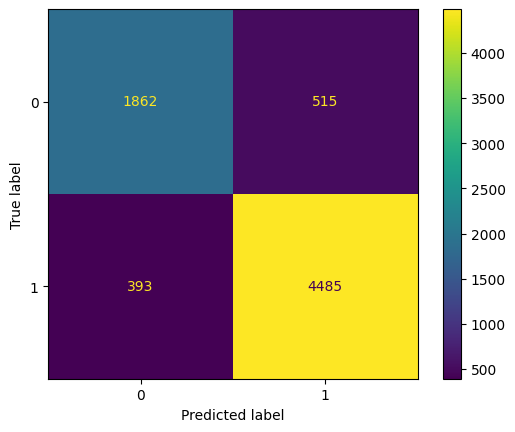

In [174]:
# tiskneme výsledky
print(classification_report(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9508
           1       1.00      1.00      1.00     19512

    accuracy                           0.99     29020
   macro avg       0.99      0.99      0.99     29020
weighted avg       0.99      0.99      0.99     29020



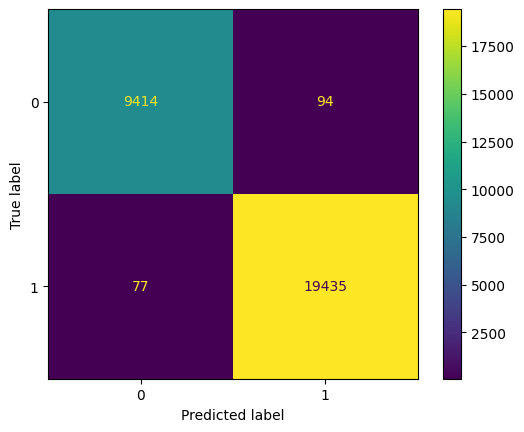

In [175]:
# vyhodnocení predikcí na trénovacími daty - pozor, z těch se přímo učil
y_pred_train_knn = knn.predict(X_train)
# tiskneme výsledky
print(classification_report(y_train, y_pred_train_knn))
cm = confusion_matrix(y_train, y_pred_train_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()

In [178]:


df_vysledky["knn"] = [recall_score(y_test, y_pred_knn, average="weighted"), balanced_accuracy_score(y_test, y_pred_knn)]

# Decison tree model


In [189]:
from sklearn.tree import DecisionTreeClassifier

In [190]:
# hodnoty parametrů, kde budeme hledat optimum
parameters_dt = {'max_depth':[3, 5, 7],
                 'criterion':['entropy', 'gini', "log_loss"],
                 'max_features':[None, "sqrt", "log2"]}
# inicializace modelu - použijeme všechny defaultní parametry - žádné nastavování
dt = DecisionTreeClassifier()

In [191]:
# inicializace optimizátoru gridsearch
gs = GridSearchCV(dt, parameters_dt, verbose=1)
# trénink kombinací a hledání nejlepšího nastavení hyperparametrů
gs.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [3, 5, 7],
                         'max_features': [None, 'sqrt', 'log2']},
             verbose=1)

In [192]:
# výsledky optimalizace
# nejlepší kombinace hyperparametrů
print(gs.best_params_)
# do knn uložíme nejlepší model z optimalizace
dt = gs.best_estimator_

{'criterion': 'gini', 'max_depth': 7, 'max_features': None}


In [193]:
y_pred_dt = dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      2377
           1       0.88      0.92      0.90      4878

    accuracy                           0.86      7255
   macro avg       0.85      0.83      0.84      7255
weighted avg       0.86      0.86      0.86      7255



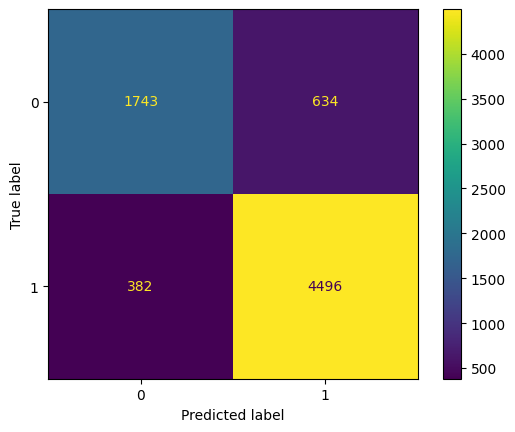

In [194]:
# tiskneme výsledky
print(classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      9508
           1       0.88      0.92      0.90     19512

    accuracy                           0.86     29020
   macro avg       0.85      0.83      0.83     29020
weighted avg       0.86      0.86      0.86     29020



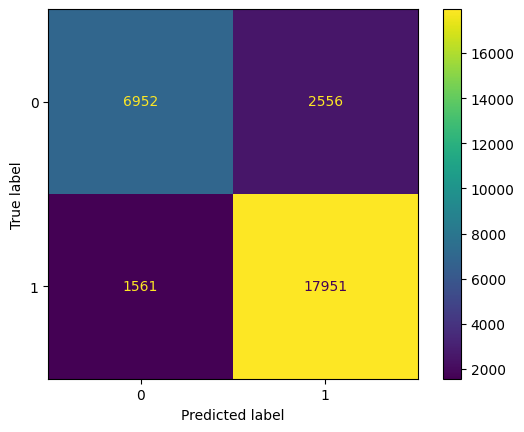

In [195]:
y_pred_train_dt = dt.predict(X_train)
# vyhodnocení predikcí na trénovacími daty - pozor, z těch se přímo učil
print(classification_report(y_train, y_pred_train_dt))
cm = confusion_matrix(y_train, y_pred_train_dt, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()

In [196]:
# Export tree to DOT format
dot_data = tree.export_graphviz(dt,
                                feature_names=dt.feature_names_in_,
                                class_names=dt.classes_.astype(str))

# Convert to graph and save as PNG -> kvůli zoomování, neztrtíme rozlišení
graph = graphviz.Source(dot_data)
graph.render("decision_tree_wine", format="png")

'decision_tree_wine.png'

In [197]:
df_vysledky["dt"] = [recall_score(y_test, y_pred_dt, average="weighted"), balanced_accuracy_score(y_test, y_pred_dt)]

# Nová sekce